## **Mission2**

### Core

In [188]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore') # warning message 무시
%matplotlib inline

In [53]:
marvel = pd.read_csv('./marvel/characters_stats.csv')

marvel.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


In [126]:
marvel.dtypes

Name            object
Alignment       object
Intelligence     int64
Strength         int64
Speed            int64
Durability       int64
Power            int64
Combat           int64
Total            int64
dtype: object

In [124]:
marvel.isnull().sum()

Name            0
Alignment       3
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

- 캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 수치의 합이 가장 큰 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라.

In [47]:
marvel[['Name','Total']].max()

Name     Zoom
Total     581
dtype: object

- 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라

In [94]:
marvel[marvel.Alignment == 'good']

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
6,Adam Monroe,good,63,10,12,100,71,64,320
...,...,...,...,...,...,...,...,...,...
604,X-Man,good,88,53,53,95,92,84,465
606,Yellowjacket,good,88,10,12,28,12,14,164
607,Yellowjacket II,good,50,10,35,28,31,28,182
608,Ymir,good,50,100,27,100,83,28,388


In [225]:
marvel[marvel.Alignment == 'bad']

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63,80,53,90,55,95,436
5,Abraxas,bad,88,100,83,99,100,56,526
11,Air-Walker,bad,50,85,100,85,100,40,460
16,Amazo,bad,75,100,100,100,100,100,575
17,Ammo,bad,1,1,1,1,0,1,5
...,...,...,...,...,...,...,...,...,...
586,Warp,bad,38,10,23,28,63,50,212
590,Weapon XI,bad,1,1,1,1,0,1,5
593,Willis Stryker,bad,38,16,23,28,41,60,206
605,Yellow Claw,bad,1,1,1,1,0,1,5


[]

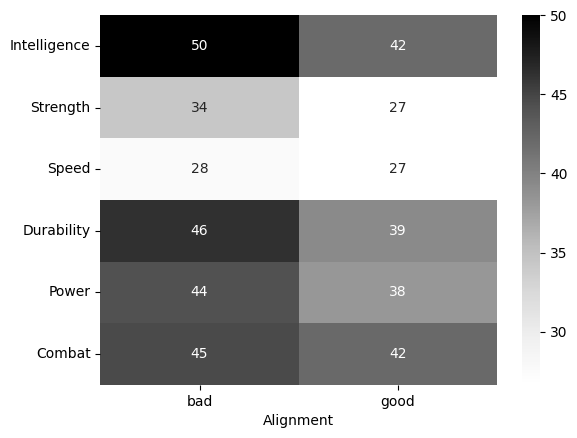

In [183]:
# 중립인 캐릭터는 제외한다.
# 성향별 캐릭터들의 각 능력치 평균
ali = marvel[['Alignment', 'Intelligence', 'Strength', 'Speed', 'Durability', 'Power', 'Combat']].groupby(['Alignment']).mean()
ali.drop('neutral', axis=0, inplace=True)
ali_transposed = ali.transpose()

sns.heatmap(ali_transposed, annot=True, cmap='Greys')
plt.plot()

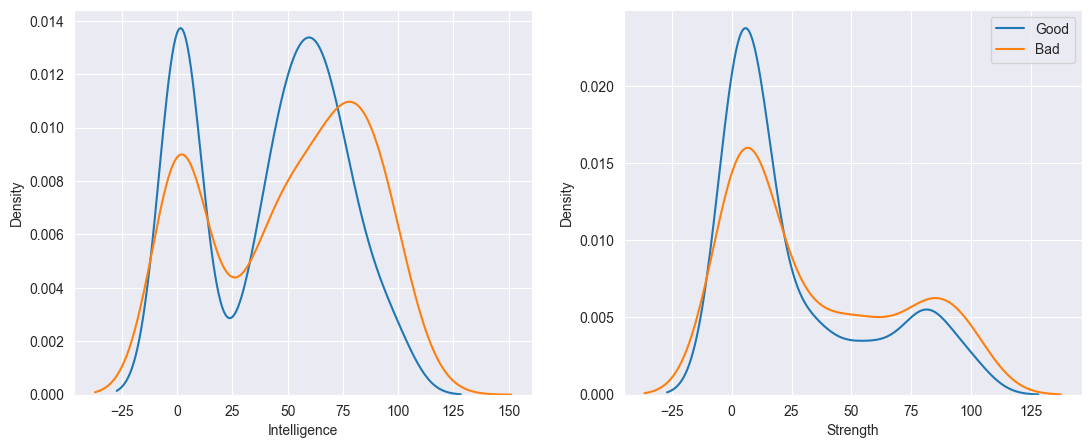

In [230]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
# Intelligence

good_intel = marvel[marvel.Alignment == 'good']['Intelligence']
bad_intel = marvel[marvel.Alignment == 'bad']['Intelligence']
sns.set_style('darkgrid')
sns.kdeplot(good_intel, ax=axes[0])
sns.kdeplot(bad_intel, ax=axes[0])

# Strength

good_str = marvel[marvel.Alignment == 'good']['Strength']
bad_str = marvel[marvel.Alignment == 'bad']['Strength']
sns.set_style('darkgrid')
sns.kdeplot(good_str, ax=axes[1])
sns.kdeplot(bad_str, ax=axes[1])


plt.legend(['Good', 'Bad'])

plt.show()

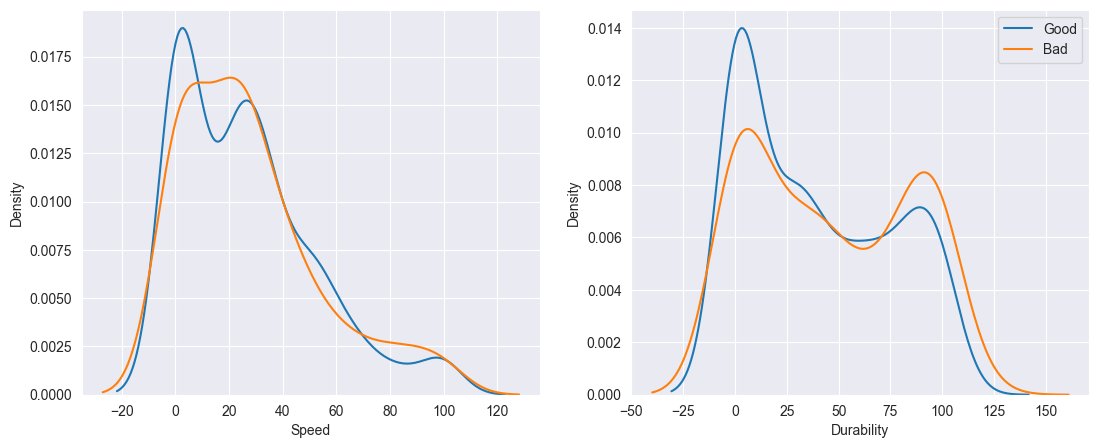

In [221]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Speed

good_str = marvel[marvel.Alignment == 'good']['Speed']
bad_str = marvel[marvel.Alignment == 'bad']['Speed']
sns.set_style('darkgrid')
sns.kdeplot(good_str, ax=axes[0])
sns.kdeplot(bad_str, ax=axes[0])

# Durability

good_str = marvel[marvel.Alignment == 'good']['Durability']
bad_str = marvel[marvel.Alignment == 'bad']['Durability']
sns.set_style('darkgrid')
sns.kdeplot(good_str, ax=axes[1])
sns.kdeplot(bad_str, ax=axes[1])


plt.legend(['Good', 'Bad'])
plt.show()

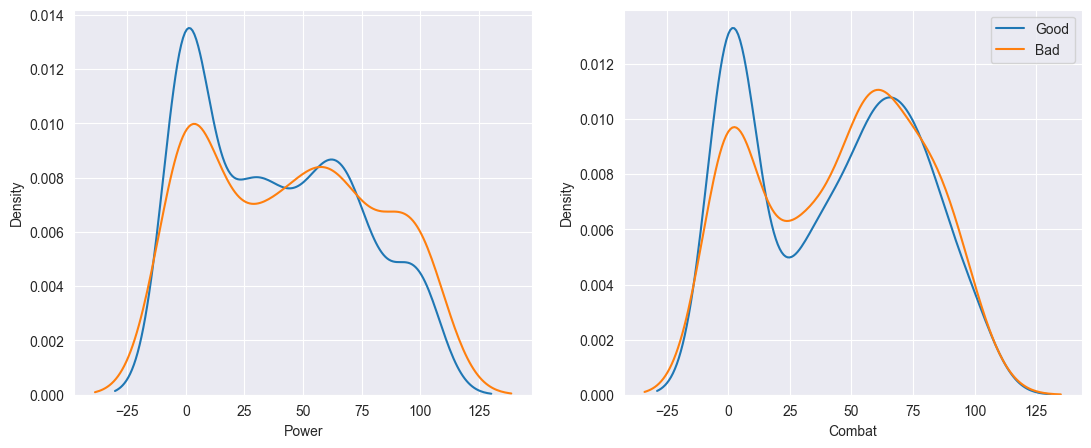

In [220]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Power

good_str = marvel[marvel.Alignment == 'good']['Power']
bad_str = marvel[marvel.Alignment == 'bad']['Power']
sns.set_style('darkgrid')
sns.kdeplot(good_str, ax=axes[0])
sns.kdeplot(bad_str, ax=axes[0])

# Combat

good_str = marvel[marvel.Alignment == 'good']['Combat']
bad_str = marvel[marvel.Alignment == 'bad']['Combat']
sns.set_style('darkgrid')
sns.kdeplot(good_str, ax=axes[1])
sns.kdeplot(bad_str, ax=axes[1])


plt.legend(['Good', 'Bad'])
plt.show()

## **그래프를 보고 알 수 있는 점들**
- good인 캐릭터들의 능력치 평균은 대체로 bad 캐릭터들의 능력치 평균보다 낮다.
- good인 캐릭터들의 능력치인 Intelligence, Durability, Power의 초반 분포만 bad 캐릭터들보다 대체로 높고 초반이후로는 낮다.
- good인 캐릭터들은 머릿수만 많고 평균적으로 약하고 bad 캐릭터들은 머릿수는 작지만 평균적으로 강하다.

## **결론**
### Villains Win!!